Repositorio: https://github.com/acabreraufrj/modelagem,   - - - - - -     [< abrir em binder >](https://mybinder.org/v2/gh/acabreraufrj/modelagem/master?filepath=aulas%2FAula17.ipynb)

# Aula 17: Séries e transformada de Fourier, algumas aplicações

## Objetivos:

- lembrar das séries e transformada de Fourier
- ver algumas das suas implementações em python
- ver algumas aplicações em modelagem de sinais (eg: audio) e modelagem com EDPs

# Séries de Fourier

- ([wiki](https://en.wikipedia.org/wiki/Fourier_series), [wolfram](http://mathworld.wolfram.com/FourierSeries.html), [sympy](https://docs.sympy.org/latest/modules/series/fourier.html) ) 
$$ s(x) = a_0/2 + \sum_{k\geq 1} a_k cos(k x \xi) + b_k sen(k x \xi), \ x\in [-L,L] $$
com $\xi = \pi/L$ escala de frequencia, $a_k,b_k \in \mathbb{R}$.

- usando numeros complexos 
$$ s(x) = \sum_{n\in \mathbb{Z}} c_n e^{i k x \xi} $$
$c_n \in \mathbb{C}$ ($c_{-n} = \overline{c}_n$ conjugados se $s(x)$ é real)

**Obs**: pode se usar $[0,2L]$ em lugar de $[-L,L]$ via translação

- dada $f(x)$ (suficientemente regular e extendida de $[-L,L]$ a $\mathbb{R}$ como função periodica) ela é aprox. por uma série de Fourier onde os coeficientes estão dados pelas 'projeções' (analogo a projetar sobre uma base ortonormal em álgebra linear)

$$ a_k = \frac{1}{L} \int_{-L}^L f(x) cos(kx\xi), \ k\geq 0$$
$$ b_k = \frac{1}{L} \int_{-L}^L f(x) sen(kx\xi), \ k\geq 1 $$

ou

$$ c_n = \frac{1}{2L} \int_{-L}^L f(x) e^{-i n x\xi }, \ n \in \mathbb{Z} $$



- Na prática, usamos só um número finito $N$ de termos
$$ s_N(x) = a_0/2 + \sum_{k=1}^N a_k cos(k x \xi) + b_k sen(k x \xi) = \sum_{n=-N}^N c_n e^{i n x \xi}$$
**Notar:** o periodo de $sen \ ou \ cos(kx\xi)$ é $2L/k$, a frequencia é $\nu_k = \frac{k}{2L}$

### Aplicações
- existem muitas aplicações! em muitas delas, usamos a série para analizar/modelar um sinal $x \mapsto f(x)$
- se a variavel representa tempo $t$, temos frequencia temporal $[\xi]=1/[tempo]$, se $[x]=[distancia]$ então falamos de frequencia espacial $[\xi] = 1/[dist]$
- Exemplos de aplicações: sinais de audio (eg:mp3), processamento de imagens (eg: jpeg), espectroscopia e interferometria (eg: radio-telescopios), óptica, sismologia/geologia, resolução de EDPs, ...
- pode se fazer series com varias variáveis, eg: pensamos $\vec \xi = (\xi_1 n_1, \xi_2 n_2), \ n_1,n_2 \in \mathbb{Z}$ e
$$ s(x,y) = \sum_{\vec \xi} c_{\vec n} e^{i \vec \xi \cdot (x,y)}$$

## Exemplos no python:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import IPython

In [7]:
# calculando N coeficientes a partir de f
def calcular_coef_Fourier(f,L,N):
    xi = np.pi/L
    a = []
    b=[]
    b.append(0)
    a0 = integrate.quad(lambda x: f(x), -L, L)[0] / L
    a.append(a0)
    for k in range(1,N+1):
        ak = integrate.quad(lambda x: f(x)*np.cos(k*x*xi), -L,L)[0] / L
        bk = integrate.quad(lambda x: f(x)*np.sin(k*x*xi), -L,L)[0] / L
        a.append(ak)
        b.append(bk)
    return a,b
        

In [8]:
# montando a serie a partir dos coeficientes
def serie_desde_ab(a,b,L,x):
    ret = a[0]/2
    N = len(b)-1
    xi = np.pi/L
    for k in range(1,N+1):
        ret += a[k]*np.cos(k*x*xi) + b[k]*np.sin(k*x*xi)
    return ret

In [9]:
# uma funçao degrau
def quadrada(x,L):
    ret = 0
    if np.abs(x) < L/2:
        ret = 1
    return ret
L = np.pi
f = lambda x: quadrada(x,L)
N = 10
af,bf = calcular_coef_Fourier(f,L,N)
sf = lambda x: serie_desde_ab(af,bf,L,x)

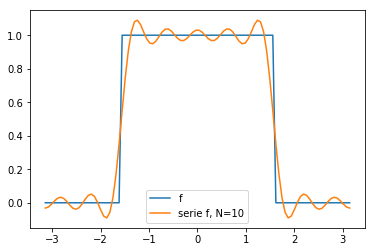

In [10]:
# plotando
Ix = np.linspace(-L,L,100)
Gf = [f(x) for x in Ix]
Gsf = [sf(x) for x in Ix]
plt.plot(Ix,Gf,label='f')
plt.plot(Ix,Gsf, label='serie f, N='+str(N))
#plt.ylim(ymin=0,ymax=2)
plt.legend()
plt.show()

#### Obs: [fenomeno de Gibbs](https://en.wikipedia.org/wiki/Gibbs_phenomenon)

nas discontinuidades de $f(x)$, a serie aproxima oscilando muito e esto não se corrige aumentando o número de termos $N$

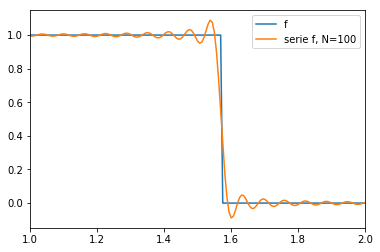

In [13]:
# incrementando o numero de termos N
N = 100
Ix = np.linspace(-L,L,10*N)
af,bf = calcular_coef_Fourier(f,L,N)
sf = lambda x: serie_desde_ab(af,bf,L,x)
Gf = [f(x) for x in Ix]
Gsf = [sf(x) for x in Ix]
plt.plot(Ix,Gf,label='f')
plt.plot(Ix,Gsf, label='serie f, N='+str(N))
plt.xlim(xmin=1,xmax=2)
plt.legend()
plt.show()

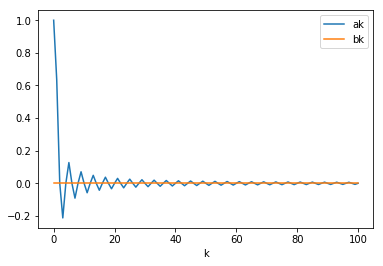

In [14]:
# vejamos os coeficientes
Ik = range(0,N+1)
plt.plot(Ik,af,label='ak')
plt.plot(Ik,bf, label='bk')
plt.xlabel('k')
#plt.ylim(ymin=0,ymax=2)
plt.legend()
plt.show()

#### Obs:

- os $b_k = 0$ pois a função é par $f(x)=f(-x)$ (se fosse impar, $f(-x) = - f(x)$ teriamos $a_k=0$)
- os $|a_k|$ são cada vez menores quando $k$ aumenta (lembrar que a serie converge!)

#### Nomenclatura:
$ a_k, b_k $ são as amplitudes dos armonicos de $f$ associadas a frequencia $\nu_k := \frac{k}{2L}$

#### outro exemplo simples:

$f(x) = sen(\xi_0 x)$ com $\xi_0 \sim 1$ (aqui $L\sim \pi$, frequencia $\nu_0 \sim 1/2\pi$)

In [15]:
# outro exemplo
L = np.pi
xie= np.pi/L + 0.1
f = lambda x: np.sin(xie*x) # seno com frequencia 2pi + epsilon
N = 10
af,bf = calcular_coef_Fourier(f,L,N)
sf = lambda x: serie_desde_ab(af,bf,L,x)

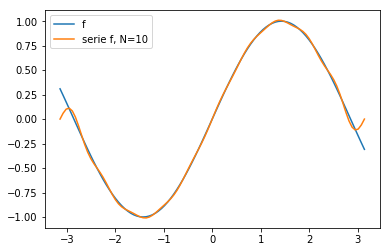

In [16]:
# plotando
Ix = np.linspace(-L,L,100)
Gf = [f(x) for x in Ix]
Gsf = [sf(x) for x in Ix]
plt.plot(Ix,Gf,label='f')
plt.plot(Ix,Gsf, label='serie f, N='+str(N))
#plt.ylim(ymin=0,ymax=2)
plt.legend()
plt.show()

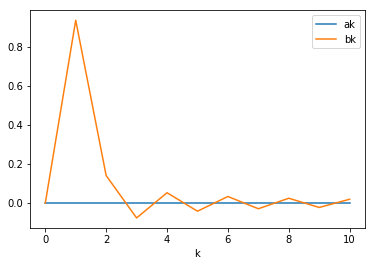

In [17]:
# vejamos os coeficientes
Ik = range(0,N+1)
plt.plot(Ik,af,label='ak')
plt.plot(Ik,bf, label='bk')
plt.xlabel('k')
#plt.ylim(ymin=0,ymax=2)
plt.legend()
plt.show()

#### o armonico que mais contribui é $k=1$, tem outros que precisam estar por $\nu \neq \nu_0$

## Exemplos modelando sinais de audio

#### algumas coisas que se podem fazer:
- compressão ficando só com alguns harmonicos
- filtros

In [18]:
archivo = "./data/A440.wav"
IPython.display.Audio(archivo)

In [3]:
from scipy.io import wavfile

In [20]:
# abrindo o wav
samplerate, data = wavfile.read(archivo)

In [21]:
print('freq. de sampleado:', samplerate)
print('data shape (2 canais stereo):',data.shape) #sao dois canais pois é stereo!
ndatos = len(data[:,0])
dur = ndatos/samplerate
print('duracao em seg:', dur)

freq. de sampleado: 44100
data shape (2 canais stereo): (44100, 2)
duracao em seg: 1.0


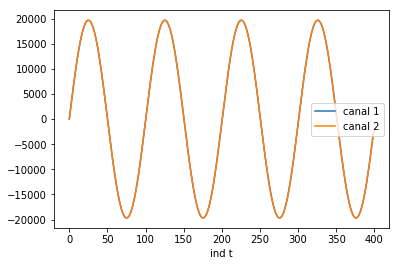

In [24]:
# plotando uma parte do sinal
It = [i/samplerate for i in range(ndatos)]
plt.plot(data[:400,0], label='canal 1')
plt.plot(data[:400,1], label='canal 2')
plt.xlabel('ind t')
plt.legend()
plt.show()

### achando os coeficientes de Fourier ("a mão")

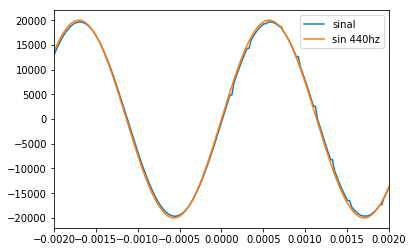

In [25]:
# transladamos para ter um sinal [-L,L]
L = max(It)/2
canal1orig = data[:,0]
Itc = [t-L for t in It]
f = lambda t: canal1orig[int((t+L)*samplerate) ]
plt.plot(Itc, [f(t) for t in Itc], label='sinal')
nu = 440 # hertz
plt.plot(Itc, [20000*np.sin(2*np.pi*nu*t) for t in Itc], label='sin 440hz')
plt.xlim(xmin=-(2*L)/500,xmax=(2*L)/500)
plt.legend()
plt.show()

#### obs: notar uns "picos" gerados pelo programa de audio (involuntariamente)

In [27]:
# valores dos parametros involvidos
xi=np.pi/L
print('L seg=', L, ', xi=',xi)
N = int(500*2*L) # quero freq. max 500hz= N/(2L)
print('N=',N)
k=500
print('freq associada a k=',k, ' é nu_k=', k/(2*L))

L seg= 0.49998866213151927 , xi= 6.28332778626771
N= 499
freq associada a k= 500  é nu_k= 500.01133812558106


In [28]:
# calculando alguns coeficientes a partir de f
def calcular_alguns_coef_Fourier(f,L,ks):
    xi = np.pi/L
    a = []
    b=[]
    for k in ks:
        ak = integrate.quad(lambda x: f(x)*np.cos(k*x*xi), -L,L)[0] / L
        bk = integrate.quad(lambda x: f(x)*np.sin(k*x*xi), -L,L)[0] / L
        a.append(ak)
        b.append(bk)
    return a,b
        

In [29]:
# montando a serie a partir de alguns coeficientes
def serie_desde_alguns_ab(a,b,L,ks,x):
    ret = 0
    xi = np.pi/L
    for ik,k in enumerate(ks):
        ret += a[ik]*np.cos(k*x*xi) + b[ik]*np.sin(k*x*xi)
    return ret

In [31]:
# achando alguns coef Fourier
ks = [int(z) for z in np.linspace(420,480,100)]
af,bf = calcular_alguns_coef_Fourier(f,L,ks)
sf = lambda x: serie_desde_alguns_ab(af,bf,L,ks,x)

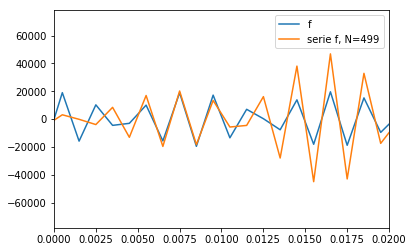

In [32]:
# plotando com zoom
Ix = np.linspace(-L,L,1000)#int(samplerate*dur))
Gf = [f(x) for x in Ix]
Gsf = [sf(x) for x in Ix]
plt.plot(Ix,Gf,label='f')
plt.plot(Ix,Gsf, label='serie f, N='+str(N))
plt.xlim(xmin=0,xmax=0.02)
plt.legend()
plt.show()

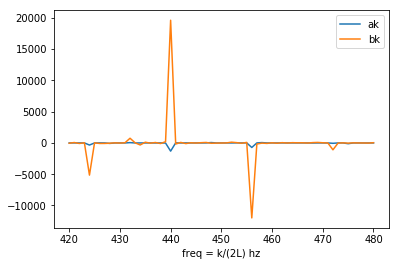

In [33]:
# vejamos os coeficientes das frequencias
freqs = [k/(2*L) for k in ks]
plt.plot(freqs,af,label='ak')
plt.plot(freqs,bf, label='bk')
plt.xlabel('freq = k/(2L) hz')
#plt.ylim(ymin=0,ymax=2)
plt.legend()
plt.show()

#### vemos o pico em 440hz!

o outro tem a ver com o 'ruido' observado na sinal...

In [314]:
# escrevemos um novo archivo com nossa serie de fourier com N termos
newdata = np.array([0.6*sf(x) for x in np.linspace(-L,L,int(samplerate*dur))])
archout = './data/A440r'+'.wav'
wavfile.write(archout,samplerate,newdata)

In [34]:
IPython.display.Audio("./data/A440re.wav")

## Obs:
- o formato mp3 guarda só algumas das frequencias e assim logra reduzir muito o tamanho dos archivos
- frequencias que os humanos ouvem: 20 a 20000 Hz ($Hz = 1/seg$)
- nos métodos de compressão, é importante se focar em estas frequencias, sendo que calcular "todas" é bem lento e ocupa muito espaço. Algo similar pode se fazer com imagens.
- no mp3 (anal. jpeg) se usam criterios avançados de "psico-acustica" baseados em obs experimentais de como os humanos 'simplificam' frequencias que estão perto
- como fizemos aqui acima, não é um metodo muito eficiente (demora muito em calcular cada contribuição de cada frequencia)
- veremos a seguir a transformada e o metodo 'fast fourier transform' (FFT)

# Transformada de Fourier

- ([wiki](https://en.wikipedia.org/wiki/Fourier_transform)) pensar no caso da serie, mas com $L\to \infty$
- para cada frequencia $\nu \in \mathbb{R}$ guardamos sua amplitude complexa (mult. por $L$ e agora convencionalmente pensamos em funcoes sob $[-L/2,L/2]$)
$$ Fou(f)(\nu):= \tilde f (\nu) = lim_{L\to \infty} \int_{-L/2}^{L/2} f(x) e^{- 2\pi i \nu x} dx = \int_{-\infty}^\infty f(x) e^{- 2\pi i \nu x} dx $$
- com $f$ suficientemente regular, obtemos uma nova função $\nu \mapsto \tilde f (\nu)$
- a ideia é que $|f(\nu)|$ é a amplitude no **espectro de frequencias** associada a freq. $\nu$
- transformada inversa
$$ Fou^{-1}(\tilde f)(x) = \int_{-\infty}^\infty \tilde f (\nu) e^{ 2\pi i \nu x} d\nu $$
para $f$ suficientemente regular, $Fou^{-1}(\tilde f) = f$.

## Exemplo: Transformada de gaussianas e mecanica quantica
- se $f(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma_x^2}}$ é uma gaussiana com media $\mu$ e largura $\sigma_x$
- consideremos a transformada $\tilde f(\nu)$ e consideremos o re-escalamento das unidades de frequencia $\nu = p/\hbar$, definiendo $F(p) = \tilde f ( p/\hbar)$ 
- pode se provar $Fou(e^{-ax^2})(\nu) \propto e^{-\pi^2 \nu^2 / a}$
- logo $F(p)$ também é uma gaussiana só que com largura $\sigma_p \sim \hbar / \sigma_x$
- em mecánica quantica, se interpreta $|f(x)|^2$ como a probabilidade de achar uma certa particula (eg: um eletron) na *posição* $x$, entanto $|F(p)|^2$ se interpreta como a probabilidade desta perticula ter *momento* $p$

**Notar**: se $f(x)$ gaussiana com largura $\sigma$, $|f(x)|^2$ tambem gaussiana com largura $\sigma/\sqrt{2}$
- esta é, então, uma 'incarnação' do [principio de incerteza](https://en.wikipedia.org/wiki/Uncertainty_principle)
$$ \sigma_x \sigma_p \geq \hbar / 2$$

## Aplicações
- a transformada se usa para estudar/modelar todo tipo de sinais: audio, imagens, espectroscopia, geologia,...
- também se usa para resolver ODEs e EDPs (Cálculo 4): a transformada de $\partial_x f$ é $-2\pi i \nu \tilde f (\nu)$, transforma derivadas em multiplicação por $\nu$. Isto vale para cada variável, caso tenha mais de uma (EDPs)
- a ideia é transformar uma eq. diferencial para $f$ em uma eq. *algebrica* para $\tilde f$, e depois aplicamos a transformada inversa (tendo em conta as cond. de contorno/iniciais)

## Ex: eq. de Poisson via transformada de Fourier
- $f \equiv f(x,y)$, $$ \partial_x^2 f + \partial_y^2 f (x,y) = g(x,y)$$
- transformamos Fourier $x$ e $y$ para $\nu=(\nu_x,\nu_y)\in \mathbb{R}^2$,
$$ -(2\pi)^2(\nu_x^2 + \nu_y^2) \tilde f (\nu) = \tilde g (\nu) $$
- logo, nossa proposta para a solução da eq. original é
$$ f(x,y) = Fou^{-1}_{\nu_x,\nu_y} \left(\frac{\tilde g(\nu)}{-\| 2\pi \nu \|^2} \right) (x,y)$$
- as condições de contorno para $f$ podem ser incorporadas com truques, dependendo do contorno (ex: [ref](http://www.thphys.nuim.ie/CompPhysics/Year4/lect11.pdf) para um retangulo).

## Fast Fourier transform (FFT)

- aqui pensamos em funções em $[0,2L]$ em lugar $[-L,L]$
- pensar na discretização da integral que define $\tilde f (\nu)$ onde os valores $f(x)$ estão substituidos por $f_j, j=1,..,N$ ([Discrete Fourier transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) )
$$ \tilde f_k = \sum_j f_j e^{-2\pi i (kj/N)} $$
- o calculo dos $\tilde f_k, k=1,..,N$ requer $N^2$ operações
- um método FFT é qualquer algoritmo que permite calcular em $O(N log(N))$
- existem [vários métodos FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform)

#### exemplo simples: transformada de fourier de $sen(2\pi x \nu_0)$ 

deve dar um pico (versão discreta de "Delta de Dirac") concentrada em $\nu=\nu_0$

In [18]:
from scipy.fftpack import fft,fftfreq, ifft

[]

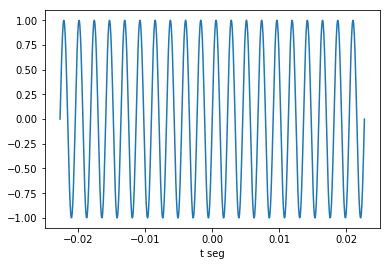

In [42]:
# uma função seno com freq. 440Hz
nu0 = 440 # Hz
ts = np.linspace(-10/440,10/440,1000)
samplerate= 1/(ts[1]-ts[0])
fs = [np.sin(2*np.pi*t*nu0) for t in ts]
plt.xlabel('t seg')
plt.plot(ts,fs)
plt.plot()

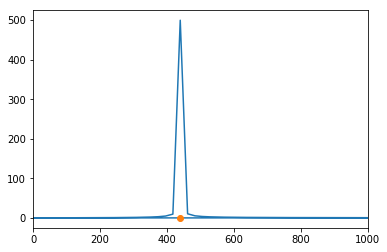

In [43]:
tifs = fft(fs)
tifs_abs = abs(tifs)
freqs = fftfreq(len(fs),1/samplerate)
plt.plot(freqs,tifs_abs)
plt.plot([440],[0],'o')
plt.xlim([0,1000])
plt.show()

## outro exemplo: La menor no violão

## Notas no violão:
- é um La menor: A2 + E3 + A3 + C4
- frequencias destas notas em Hz: [ref](http://pages.mtu.edu/~suits/notefreqs.html)

A2	110.00

E3	164.81 (E4 329.63)

A3	220.00

C4	261.63 (C5 523.25)

In [44]:
archivo = "./data/Am.wav"
IPython.display.Audio(archivo)

In [45]:
# abrindo o wav
samplerate, data = wavfile.read(archivo)

In [46]:
print('freq. de sampleado:', samplerate)
print('data shape (2 canais stereo):',data.shape) #sao dois canais pois é stereo!
ndatos = len(data[:,0])
dur = ndatos/samplerate
print('duracao em seg:', dur)

freq. de sampleado: 44100
data shape (2 canais stereo): (69120, 2)
duracao em seg: 1.5673469387755101


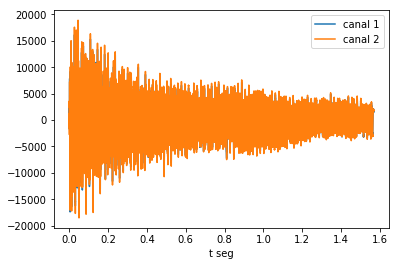

In [47]:
It = [i/samplerate for i in range(ndatos)]
plt.plot(It,data[:,0], label='canal 1')
plt.plot(It,data[:,1], label='canal 2')
plt.xlabel('t seg')
plt.legend()
plt.show()

In [48]:
datafft = fft(data[:,0])
fftabs = abs(datafft) # valor absoluto dos numeros complexos
freqs = fftfreq(len(data[:,0]),1/samplerate)


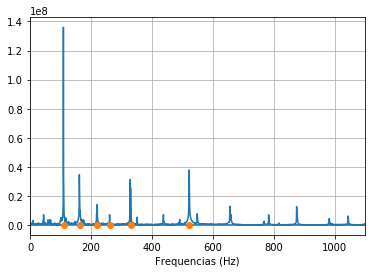

In [54]:
#plt.plot(freqs,fftabs)
plt.plot(freqs,fftabs)
#plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequencias (Hz)' )
plt.xlim([0,1100])
plt.plot([110,165,220,262,330,523],[0,0,0,0,0,0],'o')
plt.show()

### Obs:
- descobrimos armonicos de cordas nao tocadas explicitamente: E4 e C5
- Exercicio: achar quais notas são os outros picos!

## Compressão: jogando fora algumas frequencias

In [4]:
archivo = "./data/ola.wav"
IPython.display.Audio(archivo)

In [6]:
# abrindo o wav
samplerate, data = wavfile.read(archivo)

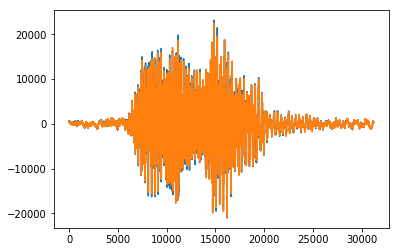

In [7]:
plt.plot(data[:])
plt.show()

In [10]:
datafft = fft(data[:,0])
fftabs = abs(datafft) # valor absoluto dos numeros complexos
freqs = fftfreq(len(data[:,0]),1/samplerate)


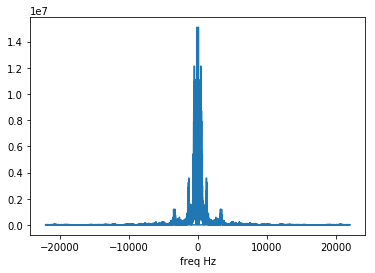

In [11]:
plt.plot(freqs, fftabs)
plt.xlabel('freq Hz')
plt.show()

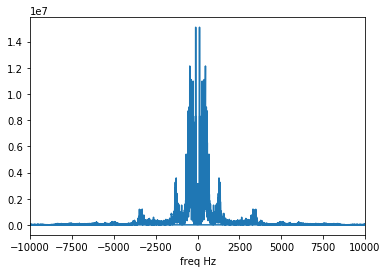

In [12]:
plt.plot(freqs, fftabs)
plt.xlim([-10000,10000])
plt.xlabel('freq Hz')
plt.show()

In [22]:
# jogar fora frequencias maiores do que fr0
fr0 = 5000 # Hz
newfoudata=[]
newfreqs = []
for i in range(len(freqs)):
    if np.abs(freqs[i])<fr0:
        newfreqs.append(freqs[i])
        newfoudata.append(datafft[i])
print('len newfoudata:', len(newfoudata))
print('len datafft:', len(datafft))
newfoudata = np.array(newfoudata)
    

len newfoudata: 7083
len datafft: 31232


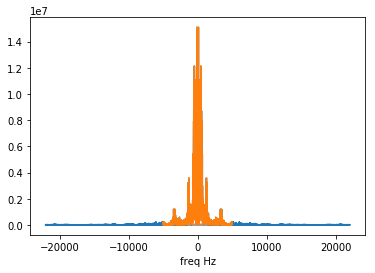

In [23]:
plt.plot(freqs, fftabs)
plt.plot(newfreqs, abs(newfoudata))
plt.xlabel('freq Hz')
plt.show()

In [63]:
# fazendo transformada inversa do new data para gerar uma nova sinal de audio (comprimida)
newdata = ifft(newfoudata)

In [64]:
newdata = newdata.real / 7 # jogando fora a parte complexa \sim 0 e normalizando a amplitude (a mao)

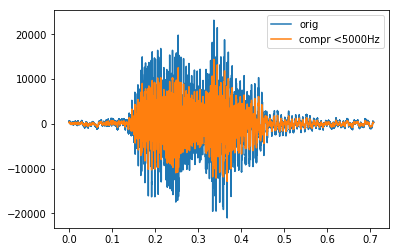

In [65]:
factor = len(data[:,0])/len(newdata)
Itorig = [i/samplerate for i in range(len(data[:,0]))]
Itnew = [j*factor/samplerate for j in range(len(newdata))]
plt.plot(Itorig,data[:,0], label='orig')
plt.plot(Itnew,newdata, label='compr <'+str(fr0)+'Hz')
#plt.xlim([0.3,0.33])
plt.legend()
plt.show()

In [68]:
# escrevemos um novo archivo com nossa serie de fourier com N termos
archout = './data/ola_compr<'+str(fr0)+'Hz.wav'
wavfile.write(archout,int(samplerate/factor),newdata)

In [72]:
arch= './data/ola_compr<5000Hz_play.wav'
IPython.display.Audio(arch)

## Exercicios:
- analizar o espectro de Fourier de "./data/sol.wav" e achar quais foram as notas tocadas no violão
- comprimir um sinal de audio com uma palavra com "f" ou "s" e verificar que é dificil distinguir entre elas se jogamos fora freq. $\geq 8000Hz$. Calcular a porcentagem de compressão.
- fazer um filtro para 'limpar' ruido de certas frequencias (eg: limpar o sinal do 'A440r.wav' que fizemos acima!)
- fazer um afinador ("tuner", eg: para afinar o violão), que pegue um sinal de audio, reconheça qual a frequencia da qual esta perto, e expresse o erro indicando se precisa sobir o baixar para estar afinado
- (*) resolver a eq. de Poisson 2d usando "fast Fourier transform" (veja [ [ref] ](http://www.thphys.nuim.ie/CompPhysics/Year4/lect11.pdf) )
